# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [61]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [62]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.mstats import zscore
import statsmodels.api as sm

In [63]:
# print dataframe info to check any missing item
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [64]:
#quick view of the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [65]:
#print some basic stats for the data
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [66]:
#write some common resources (functions) 

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)
    # x-data for the ECDF: x
    x=  np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    #print("Corr Mat: ", corr_mat)
    # Return entry [0,1]
    return corr_mat[0,1]

<h3>Q1. Is the distribution normal?</h3>
<h4>Analysing the distribution</h4>
The central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.
<br><br>

Distribution can be tested for normalcy by using following methods/techniques <br>
<br>
<b>A. Graphical Method #1 : Histogram</b><br>
Assuming that the temperature observations are all independent (i.e. temperature on an individual is not dependednt on other) , lets plot the data as histogram and see if it follows follows the bell curve (normal distribution). If it does then that is a good indication that the population might also be distributed normally.




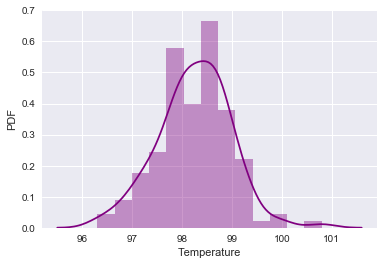

In [154]:
sns.set()
_ = sns.distplot(df.temperature, color="purple")
plt.xlabel("Temperature")
plt.ylabel("PDF")
plt.show()

<h4>Conclusion:</h4> 
<ul>
<li>Curve seems following the normal distribution with a little bit of bigger tail on the right 
</ul>

<br><br>
<b>B. Graphical Method #2 : CDF By Sampling</b><br>

We can also get an idea by ploting the sample with theoretical normaly distributed sample data generated by np.random.normal


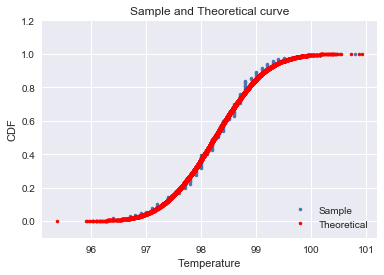

In [68]:
x,y=ecdf(df.temperature)
plt.cla()
_=plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Temperature")
plt.ylabel("CDF")
plt.title("Sample and Theoretical curve")
mu=np.mean(df.temperature)
sigma=np.std(df.temperature)
#print(mu,sigma)
samples = np.random.normal(mu, sigma, size=10000)
#print(samples)

x_theo,y_theo=ecdf(samples)
_=plt.plot(x_theo, y_theo, marker='.', linestyle='none', color="red")

_ = plt.legend(('Sample', 'Theoretical'), loc='lower right')
plt.ylim(-0.1, 1.2)

plt.show()

<h4>Conclusion:</h4> 
<ul>
<li>From the plot it appears that temperature data coincide with theoratical normally distributed data
</ul>


<br><br>
<b>C. Graphical Method #3 : Quantile Plot</b><br>

Plotting quantile plot with z-score should result in straight line

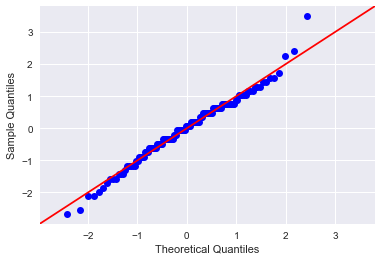

In [72]:

zscores = zscore(df.temperature)
sm.qqplot(zscores, line='45')
plt.show()


<h4>Conclusion:</h4> 
<ul>
<li>A staright line is proves that the sample is normally distributed
</ul>


<br><br>
<b>D. Normality Test : Through p-value</b><br>

By obtaining p-value sing scipy stats to test whether a sample differs from a normal distribution. This function tests the null hypothesis that a sample comes from a normal distribution

In [73]:
ntest=stats.normaltest(df.temperature)
print(ntest 

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


<h4>Conclusion:</h4> 
<ul>
<li>p value (0.258) is greater as compared to threshold (0.05).
<li>Generally threshold cuttoff value for p for significance is 0.05. 
<li>Since p-value is greater so null hypothesis can not be rejected and proves that the sample comes from normal distribution
</ul>


<hr>
<hr>
<h3>Q2. Is the sample size large? Are the observations independent?</h3>
<h4>Can be checked by analyzing the size of the sample</h4>
According to central limit theorem (CLT), a sample size greater that 30 can be considered as large enough. The observations are also independent as the temperature and heart rate of one individual is not dependent on other.


In [74]:
print(len(df.temperature))

130


<h4>Conclusion:</h4> 
<ul>
<li>Sample is of size 130 which is larger than 30.
<li>Sample is large enough to do other statistics 
</ul>


<hr>
<hr>
<h3>Q3. Is the true population mean really 98.6 degrees F?</h3>
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In [155]:
def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))

replicates=np.empty(10000)
for i in range(10000):
    replicates[i]=  bootstrap_replicate(df.temperature, np.mean)

sem = np.std(df.temperature)/np.sqrt(len(df.temperature))
print(sem)

bs_std =  np.std(replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

0.0640566146952
0.0642286550078


In [51]:
np.percentile(replicates, (2.5, 97.5))

array([ 98.12538462,  98.37307692])

<h4>Conclusion:</h4> 
<ul>
<li>95% confidence interval is between 98.12461538 and 98.37461538.
<li>Ths shows that the population mean is not 98.6 degrees F
</ul>



<hr><hr>
<b>One Sample Test</b><br>
We will be doing one sample test because we have one sample of data (temperature) comparing with a single number 98.6

<br>

<b>Hypothesis</b>
<ul>
<li>Null Hypothesis : The true mean temperature is 98.6 F
<li>Alternate Hypothesis : The true mean temperature is not 98.6 F
</ul>

Generate teparature data as if it had mean of 98.6


In [22]:
np.mean(df.temperature)

98.24923076923078

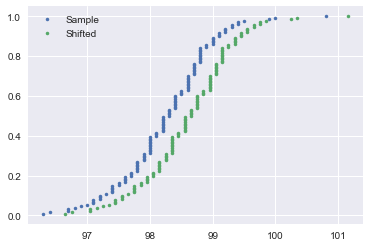

In [30]:
new_mean = 98.6
shifted_temperature = df.temperature - np.mean(df.temperature) + new_mean 
#print(shifted_temperature)
x,y=ecdf(df.temperature)
x_shifted,y_shifted=ecdf(shifted_temperature)
plt.plot(x,y, marker='.', linestyle='none')
plt.plot(x_shifted,y_shifted, marker='.', linestyle='none')
_ = plt.legend(('Sample', 'Shifted'))
plt.show()




In [24]:
def diff_from_new_mean(data, n_mean=99.6):
    return np.mean(data)-n_mean

In [25]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)

    return bs_replicates


In [26]:
diff = diff_from_new_mean(df.temperature)
print(diff)

-1.3507692307692167


In [75]:
bs_replicate = draw_bs_reps(shifted_temperature, diff_from_new_mean, 10000)
p_value =  np.sum(bs_replicate <= diff)/10000
#print(bs_replicate)
print(p_value)

0.0



<h4>Conclusion:</h4> 
<ul>
<li>Since p value is 0 so that we can reject the null hypothesis 
</ul>


<br><br>
<hr>
<h4>t or z Statistics?</h4><br>
<b>Conditions for t Statistics</b>
<ul>
<li>Sample size should be less than 30
<li>Population standard deviation is unknown
</ul>



<h4>Conclusion:</h4> 
<ul>
<li>Since sample size is more than 30, z statustics is more appropriate.
</ul>


<hr>
<hr>
<h3>Q4 Draw a small sample of size 10 from the data and repeat both frequentist tests.</h3>
    <ul>
    <li> Which one is the correct one to use?
    <li> What do you notice? What does this tell you about the difference in application of the t and z statistic?
    </ul>

In [115]:
population_mean=98.6
sample_10 = df.temperature.sample(n=10).values
#print(sample_10)
# t-value
t = (sample_10.mean() - population_mean) / (np.std(sample_10)/np.sqrt(len(sample_10)))
t_crit = stats.t.ppf(0.05 / 2, len(sample_10) - 1)
print('t-value:', t)
print('critical t-value:', t_crit)

t-value: -1.24514561273
critical t-value: -2.26215716274


In [116]:
# z-value
SE = np.std(sample_10) / np.sqrt(len(sample_10))
z = (sample_10.mean() - population_mean) / SE
print('z-value:', z)

z-value: -1.24514561273



<hr>
<hr>
<h3>Q5. At what temperature should we consider someone's temperature to be "abnormal"?</h3>
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>



In [117]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature, len(df.temperature)))
# Calculate 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)


[ 98.12307692  98.37307692]


<h4>Conclusion:</h4> 
<ul>
<li>Looking at 95% confidence interval, the abonormal temperature would be anything below 98.13 and over 98.37 degrees. 
</ul>



    
<h3>Q6. Is there a significant difference between males and females in normal temperature?</h3>
<ul>
<li> What testing approach did you use and why?
<li> Write a story with your conclusion in the context of the original problem.
</ul>
<br>
 <b>Approach</b>
 Will define the null hypothesis as there is no mean difference in means for male and females<br>
 Will separate out male and female samples and determine the mean difference. Then will generate permutaion samples for male and female temperature and compute the difference of means for the replicates. Calculating p value from the permutation replicant will give us idea if hypothesis can be accepted
 <br><br>
 <b>Null Hypothesis H0 </b>: There is no significant mean differences between males and females<br>
 <b>Alternate Hypothesis HA </b>: Male and female temparature are different

In [118]:
#extract male and female observations
male_sample =df[df['gender']=='M'].temperature.values
female_sample =df[df['gender']=='F'].temperature.values


In [119]:
male_sample_mean =np.mean(male_sample) 
female_sample_mean =np.mean(female_sample) 
print(male_sample_mean, female_sample_mean)

98.1046153846 98.3938461538


In [120]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff
sample_mean_diff = abs(diff_of_means(male_sample, female_sample))
print(sample_mean_diff)

0.289230769231


In [144]:
# create permuation samples and calculate difference between their means
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2


permuation_reps = draw_perm_reps(male_sample, female_sample, diff_of_means, size=10000)

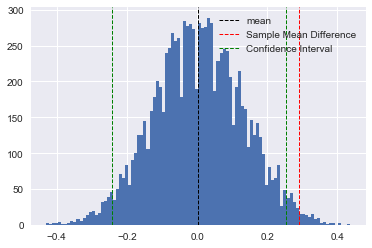

In [153]:
plt.cla()
int_95 = np.percentile(permuation_reps, [2.5, 97.5])
#int_99 = np.percentile(permuation_reps, [0.05, 99.95])
_=plt.hist(permuation_reps, bins=100)
plt.axvline(permuation_reps.mean(), color='black', linestyle='dashed', linewidth=1)
plt.axvline(sample_mean_diff, color='red', linestyle='dashed', linewidth=1)
plt.axvline(int_95[0], color='green', linestyle='dashed', linewidth=1)
plt.axvline(int_95[1], color='green', linestyle='dashed', linewidth=1)
plt.legend(('mean', 'Sample Mean Difference', 'Confidence Interval'))
plt.show()

In [151]:

p_value = np.sum(permuation_reps >= sample_mean_diff) / len(permuation_reps)
print('p-value:', p)


p-value: 0.012


<h4>Conclusion:</h4> 
<ul>
<li>Since the p-value (0.012) is less than the threshold of 0.05, we can reject the null hypothesis and accept that there is difference in means for male and female temperature.
</ul>